IMAGE SEGMENTATION

I) Line detection


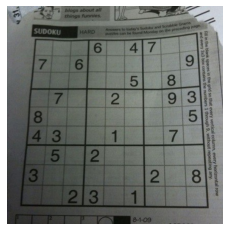

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#Load image
img = cv.imread('Sodoku.jpeg')
b, g, r = cv.split(img)
rgb = cv.merge([r, g, b])
plt.imshow(rgb),plt.axis('off')
plt.show()

Load image

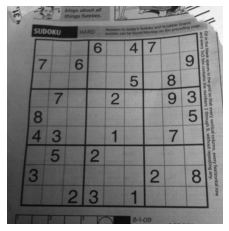

In [6]:
#Convert to grayscale
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,'gray'),plt.axis('off')
plt.show()

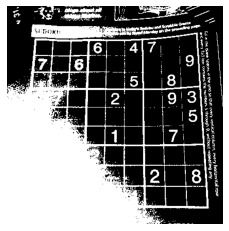

In [7]:
#Otsu threshold
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh,'gray'),plt.axis('off')
plt.show()

After thresholding, we lost a lot of image's features

(-0.5, 418.5, 422.5, -0.5)

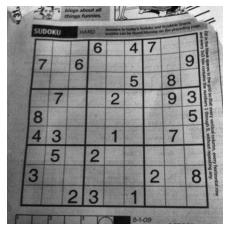

In [8]:
#Histogram Equ
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1=clahe.apply(gray)
plt.imshow(cl1,'gray')
plt.axis('off')

After we apply CLAHE

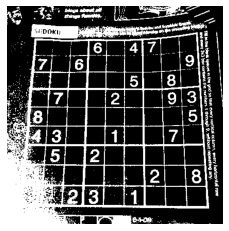

In [9]:
#Re-apply threshold
ret, thresh = cv.threshold(cl1,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh,'gray'),plt.axis('off')
plt.show()

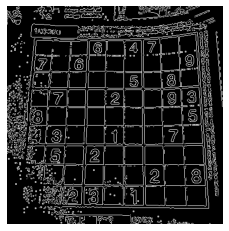

In [10]:
#Canny edge
edges = cv.Canny(thresh,100,200)
plt.imshow(edges,'gray'),plt.axis('off')
plt.show()


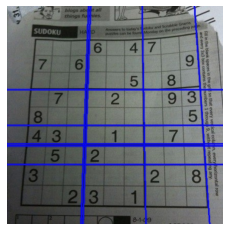

In [11]:
lines = cv.HoughLines(edges,1,np.pi/180,200)
#Create a copy
img_copy=np.copy(rgb)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img_copy,(x1,y1),(x2,y2),(0,0,255),2)

cv.imwrite('houghlines3.jpg',img_copy)
result=cv.imread('houghlines3.jpg')
plt.imshow(result),plt.axis('off')
plt.show()

II) EDGE DETECTION

<IPython.core.display.Javascript object>


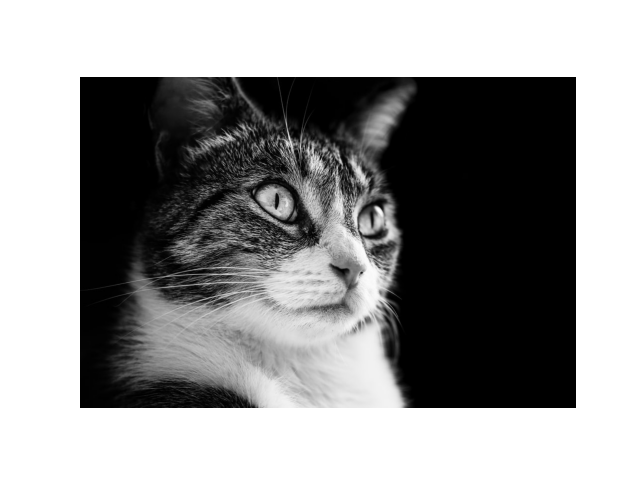

In [16]:
%matplotlib notebook
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import ShowImg

#Load image
img = cv.imread('meo.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


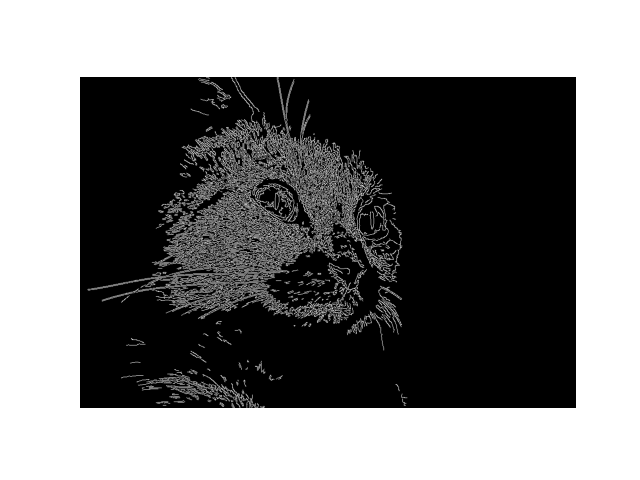

In [17]:
edges = cv.Canny(img,100,200)
plt.imshow(edges,'gray')
plt.axis('off')
plt.show()

Edges in image

<IPython.core.display.Javascript object>


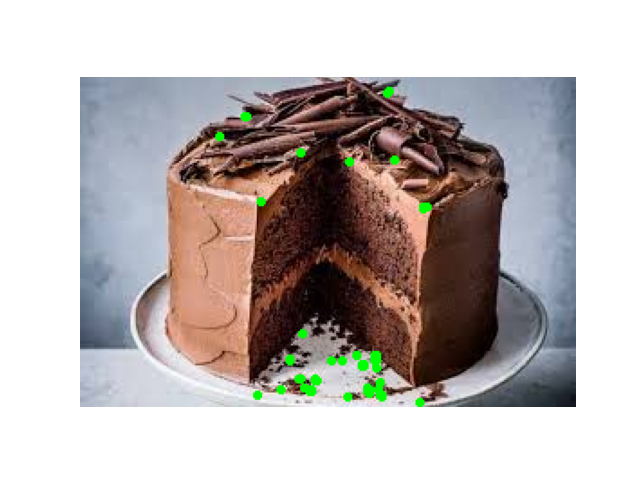

In [18]:
#Load image
img = cv.imread('Corner.jpeg')

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = np.float32(gray)

#Detect corners:
#Note: cornerHarris func can only be performed on grayscale image
dst = cv.cornerHarris(gray,2,3,0.04)

#Arguments cv.cornerHarris()
#img - Input image, it should be grayscale and float32 type.
#blockSize - It is the size of neighbourhood considered for corner detection
#ksize - Aperture parameter of Sobel derivative used.
#k - Harris detector free parameter in the equation.

#Dilate corner image to highlight them
dst = cv.dilate(dst,None)

# This value vary depending on the image and how many corners we want to detect
thresh = 0.4*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(img)

#Change to RGB
b, g, r = cv.split(corner_image)
corner_image = cv.merge([r, g, b])

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv.circle( corner_image, (i, j), 1, (0,255,0), 1)


plt.imshow(corner_image)
plt.axis('off')
plt.show()

III) MORPHOLOGY TRANSFORMATION

<IPython.core.display.Javascript object>


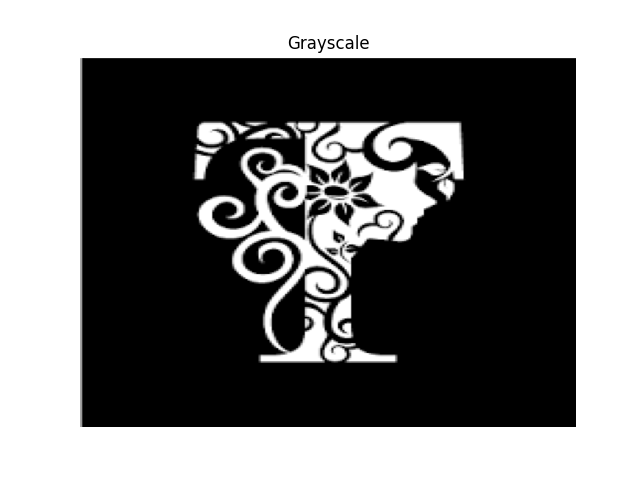

In [19]:
#Load image
image = cv.imread('T.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#Plot image
ShowImg.show1img('Grayscale',gray,'gray',3)


<IPython.core.display.Javascript object>


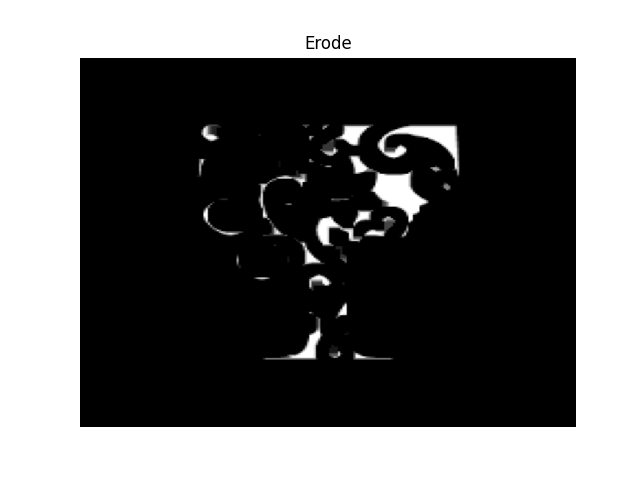

In [20]:
#Create kernel
kernel = np.ones((5,5),np.uint8)

#Load a simple image and convert to grayscale
gray1= cv.imread('T.png',0)

#Erode
#Black background erode white foreground
erosion = cv.erode(gray1,kernel,iterations = 1)
ShowImg.show1img('Erode',erosion,'gray',3)

<IPython.core.display.Javascript object>


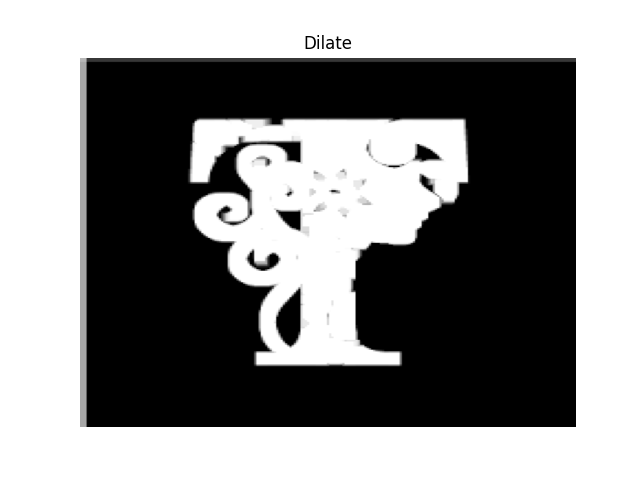

In [21]:
#Dilate
#Opposite to erode
dilation = cv.dilate(gray1,kernel,iterations = 1)
ShowImg.show1img('Dilate',dilation,'gray',3)

<IPython.core.display.Javascript object>


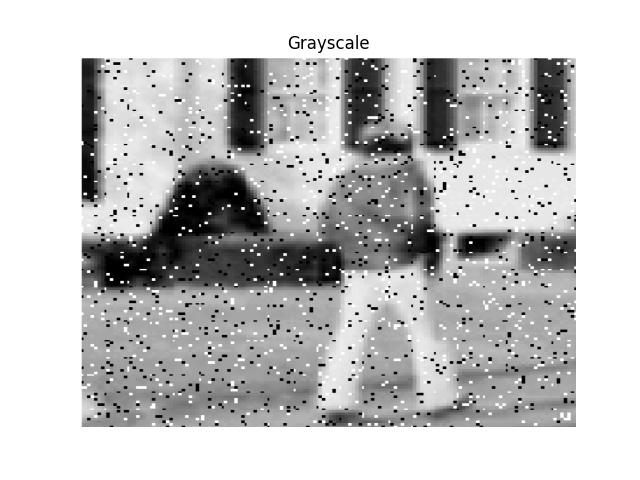

In [22]:
#Opening is another name of erosion followed by dilation. It is useful in removing noise
gray = cv.imread('noiseimg.png',0)
ShowImg.show1img('Grayscale',gray,'gray',3)

<IPython.core.display.Javascript object>


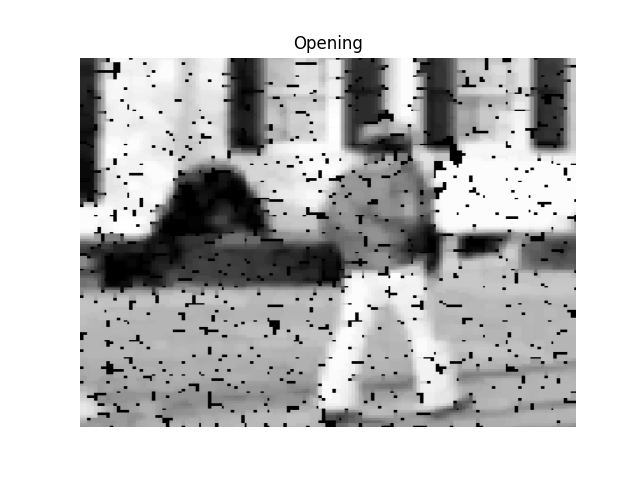

In [23]:
opening = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)
ShowImg.show1img('Opening',opening,'gray',3)

<IPython.core.display.Javascript object>


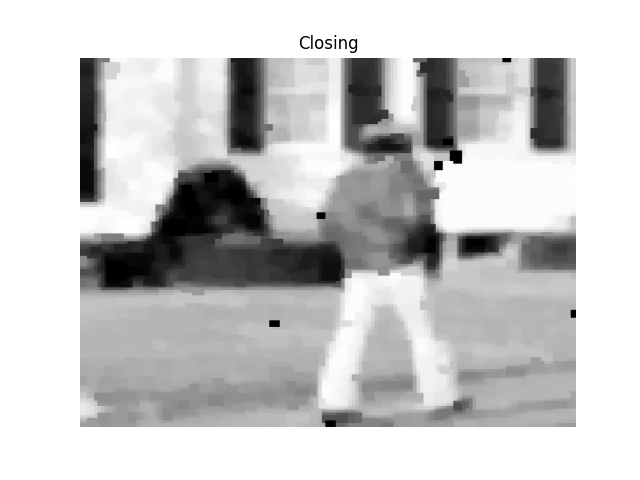

In [24]:
#Closing is reverse of Opening, Dilation followed by Erosion.
# It is useful in closing small holes inside the foreground objects,
# or reduce small black points on the object.
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
ShowImg.show1img('Closing',closing,'gray',3)

Morphological Gradient

It is the difference between dilation and erosion of an image

It enhances intensity variations in images

=> used in segmentation applications with edge finders such as sequential searches, thresholdings or the watershed transformation


<IPython.core.display.Javascript object>


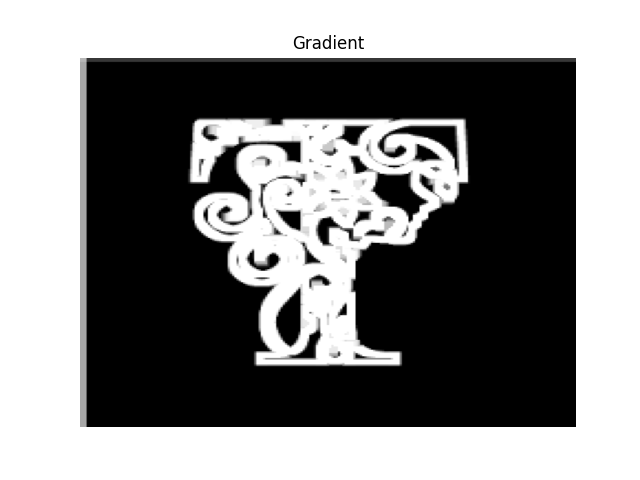

In [25]:
gray = cv.imread('T.png',0)
gradient = cv.morphologyEx(gray, cv.MORPH_GRADIENT, kernel)
ShowImg.show1img('Gradient',gradient,'gray',3)

<IPython.core.display.Javascript object>


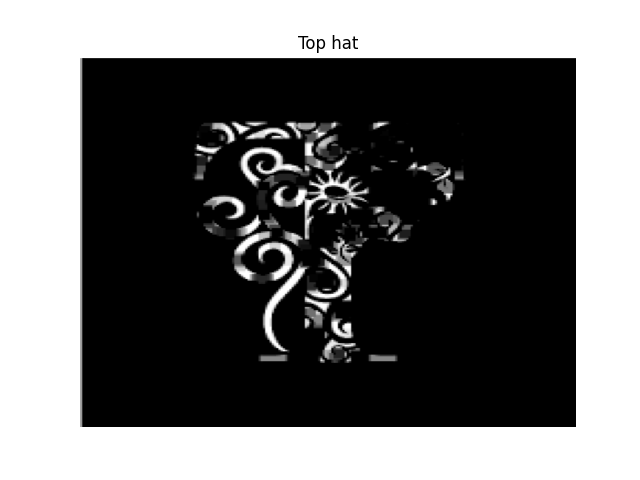

In [26]:
#Top Hat
#It is the difference between input image and Opening of the image
#Used to enhance bright objects of interest in a dark background
tophat = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)
ShowImg.show1img('Top hat',tophat,'gray',3)

<IPython.core.display.Javascript object>


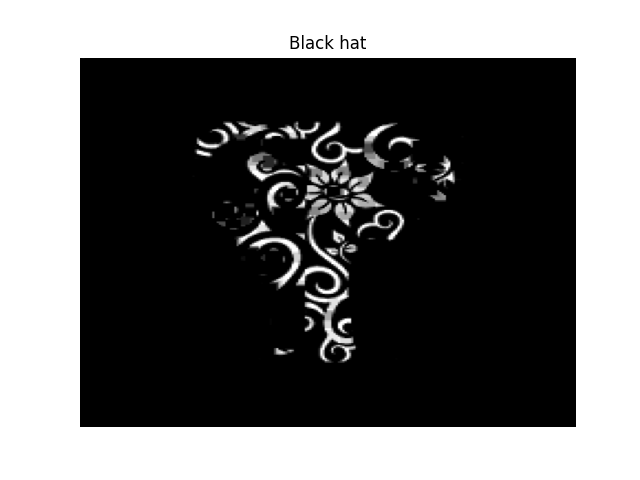

In [27]:
#Black Hat
#It is the difference between the closing of the input image and input image.
#The black-hat operation is used to do the opposite
#Enhance dark objects of interest in a bright background.
blackhat = cv.morphologyEx(gray1, cv.MORPH_BLACKHAT, kernel)
ShowImg.show1img('Black hat',blackhat,'gray',3)

IV) IMAGE THRESHOLDING

<IPython.core.display.Javascript object>


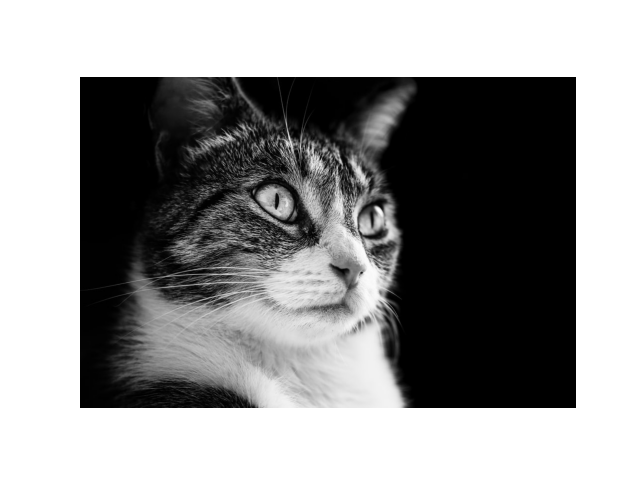

(-0.5, 999.5, 666.5, -0.5)

In [28]:
#Load image
img = cv.imread('meo.jpeg')
#If image is not a grayscale image, convert it to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img)
plt.axis('off')

<IPython.core.display.Javascript object>


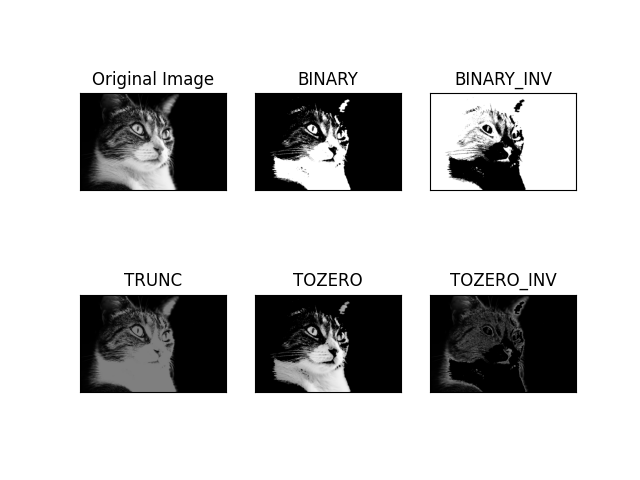

In [29]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)        #if src(x,y) > thres = maxval else = 0
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)    #if src(x,y) > thres = 0 else = maxval
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)         #if src(x,y) > thres = thres else = src(x,y)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)        #if src(x,y) > thres = src(x,y) else = 0
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)    #if src(x,y) > thres = 0 else = src(x,y)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
ShowImg.showImg(6,images,titles)

<IPython.core.display.Javascript object>


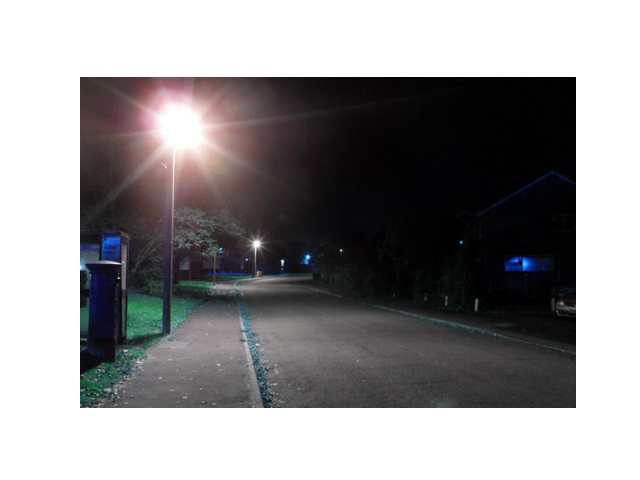

(<matplotlib.image.AxesImage at 0x7f68280f2320>, (-0.5, 599.5, 399.5, -0.5))

In [30]:
#If an image has different lighting conditions in different areas => Global Threshold will badly perform
#Adaptive threshold
img = cv.imread('lightingproblem.jpg')
plt.imshow(img), plt.axis('off')

<IPython.core.display.Javascript object>


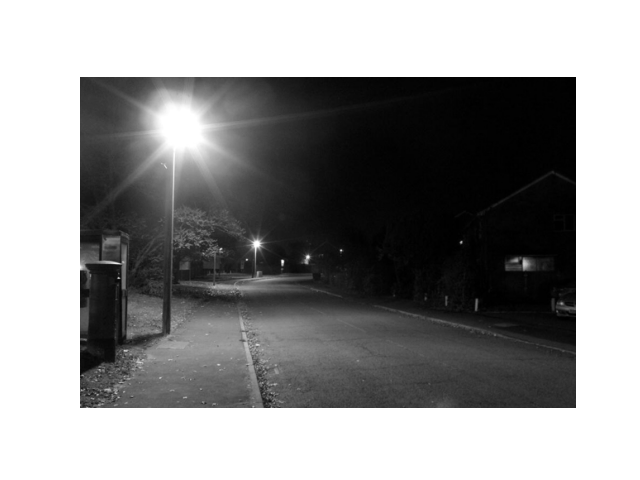

(<matplotlib.image.AxesImage at 0x7f68280443c8>, (-0.5, 599.5, 399.5, -0.5))

In [31]:
#If image is not a grayscale image, convert it to grayscale
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray,'gray'),plt.axis('off')

<IPython.core.display.Javascript object>


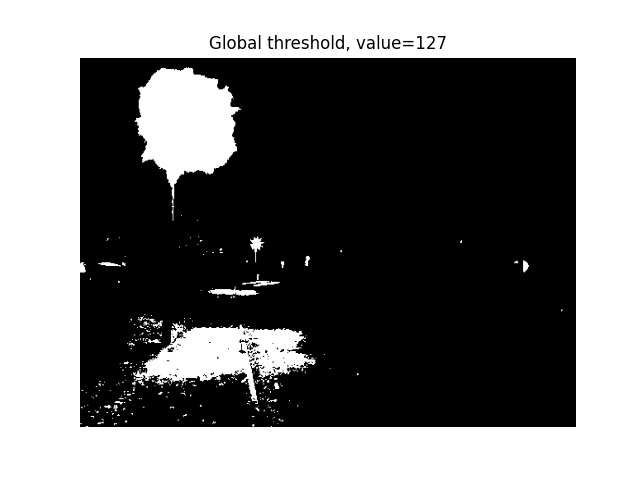

In [32]:
#Global Threshold, value = 127
ret,th1 = cv.threshold(img_gray,127,255,cv.THRESH_BINARY) 
#Apply Adaptive Threshold
th2 = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2) #Apaptive thresh mean
th3 = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2) #Adaptive gaussian
ShowImg.show1img("Global threshold, value=127",th1,'gray',3)

<IPython.core.display.Javascript object>


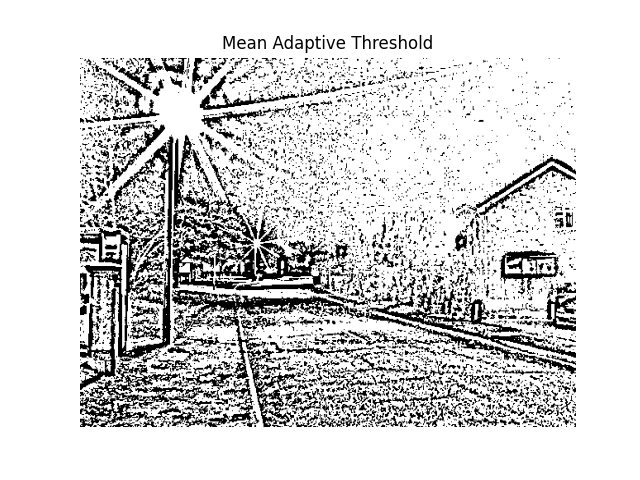

In [33]:
ShowImg.show1img("Mean Adaptive Threshold",th2,'gray',3)


<IPython.core.display.Javascript object>


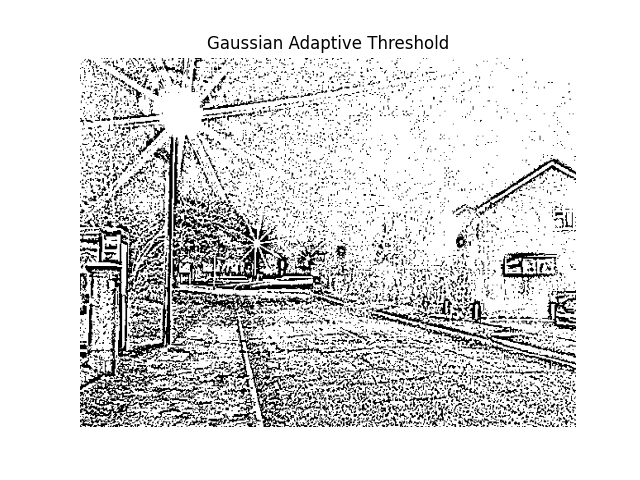

In [35]:
ShowImg.show1img("Gaussian Adaptive Threshold",th3,'gray',3)

<IPython.core.display.Javascript object>


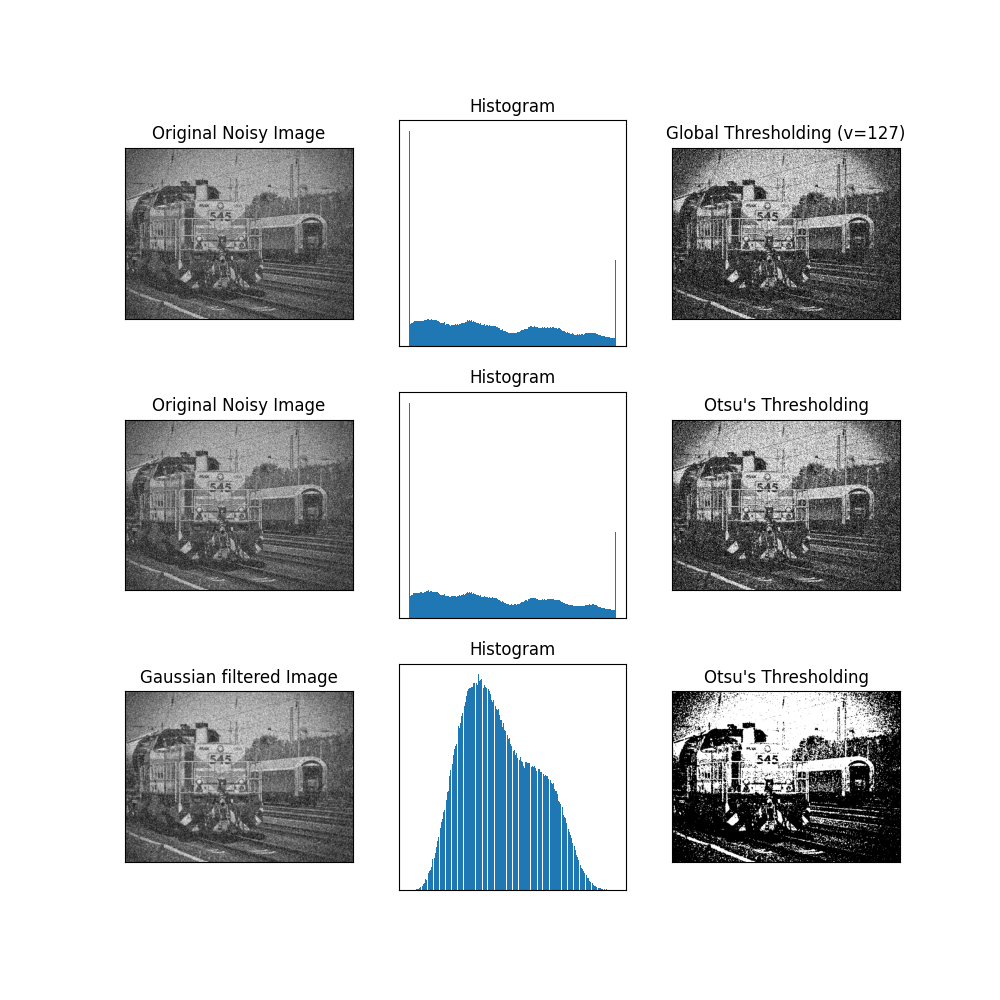

In [42]:
#Otsu
#Global threshold: Chose value manually => Trial and error
# => Otsu 'll choose value automatically
# => How: determines an optimal global threshold value from the image histogram 

#Load an image with Gaussian Noise
img = cv.imread('noise_test.jpg',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY) #Global Threshold v = 127

# Otsu's thresholding without reducing noise
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0) #Use Gaussian Blur with kernel 5x5 to reduce noise
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #Sau do ap dung Otsu threshold

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

V) WATER SEGMENTATION

Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks 

and hills while low intensity denotes valleys

filling every isolated valleys (local minima) with different colored water (labels)

the water rises, depending on the peaks (gradients) nearby

water from different valleys (different colors) will start to merge

To avoid that, build barriers in the locations where water merges. 

Continue the work of filling water and building barriers 

=> all the peaks are under water. 

=> the barriers we created gives the segmentation result

<IPython.core.display.Javascript object>


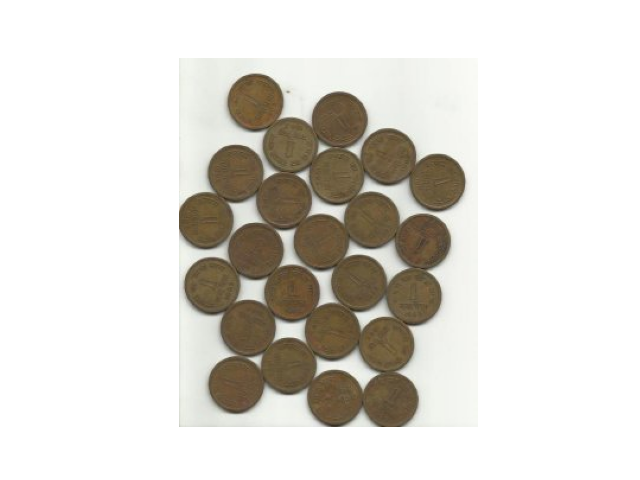

In [44]:
#Import library
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import ShowImg

#Load image
img = cv.imread('coins.jpg')
b, g, r = cv.split(img)
rgb = cv.merge([r, g, b])
plt.imshow(rgb)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


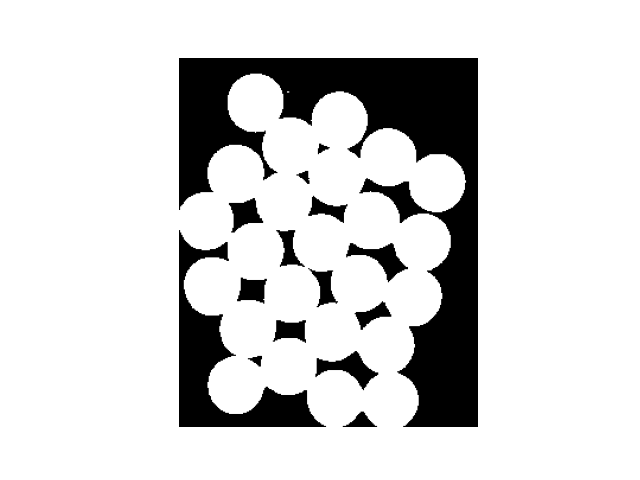

In [45]:
#Convert to grayscale
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#Apply Otsu Threshold
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh,'gray')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


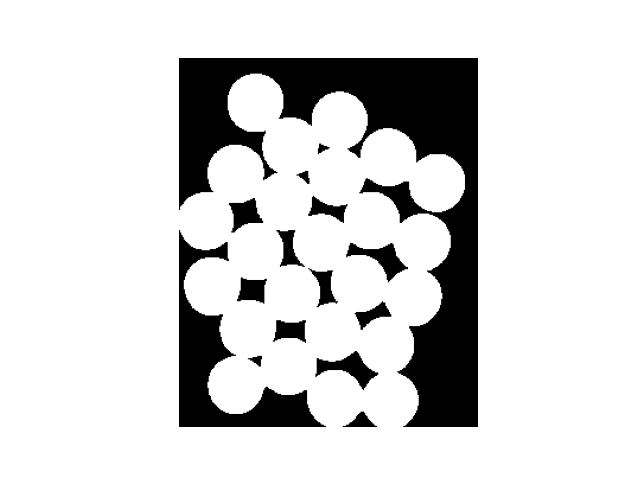

In [46]:
#Reduce noise, close small black holes by using opening
kernel = np.ones((3,3),np.uint8) #Create a kernel 3x3
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening,'gray')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


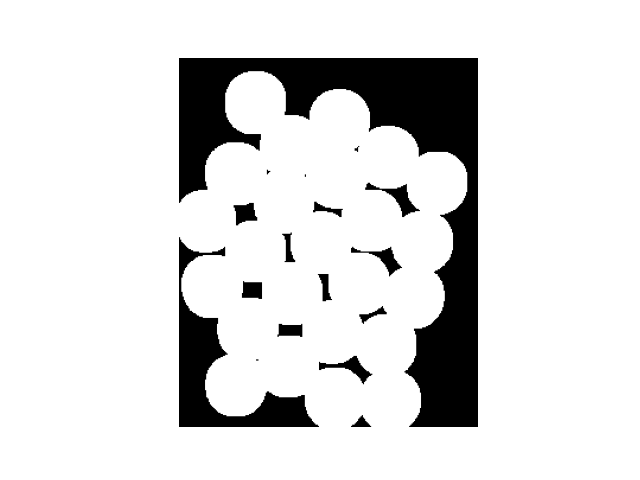

In [47]:
# Sure background area
sure_bg = cv.dilate(opening,kernel,iterations=2)
plt.imshow(sure_bg,'gray')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


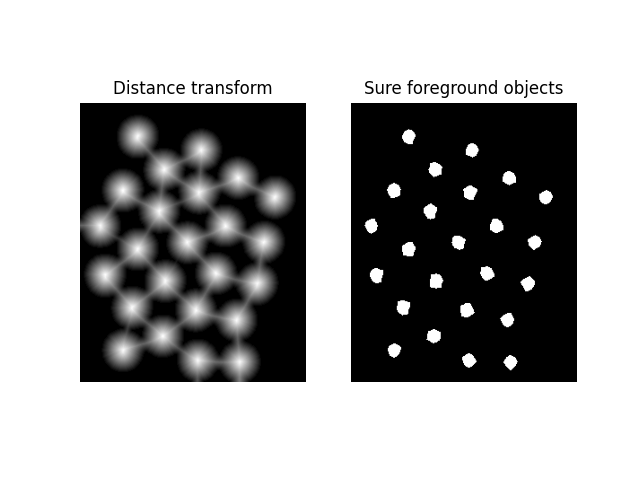

In [48]:
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.subplot(121), plt.imshow(dist_transform,'gray'),plt.axis('off'),plt.title('Distance transform')
plt.subplot(122), plt.imshow(sure_fg,'gray'),plt.axis('off'),plt.title('Sure foreground objects')
plt.show()

<IPython.core.display.Javascript object>


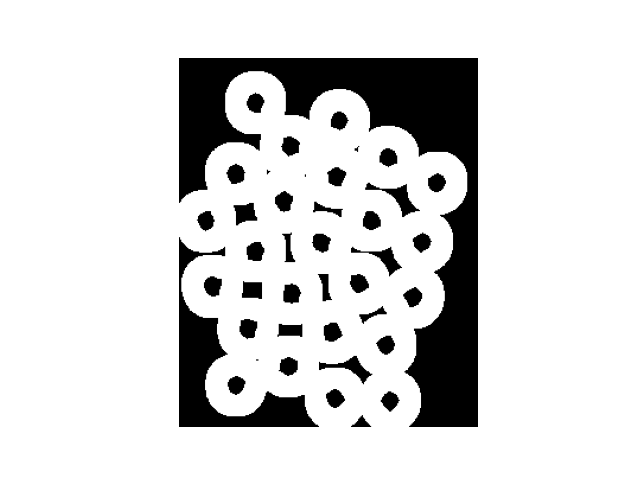

In [49]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown,'gray'),plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


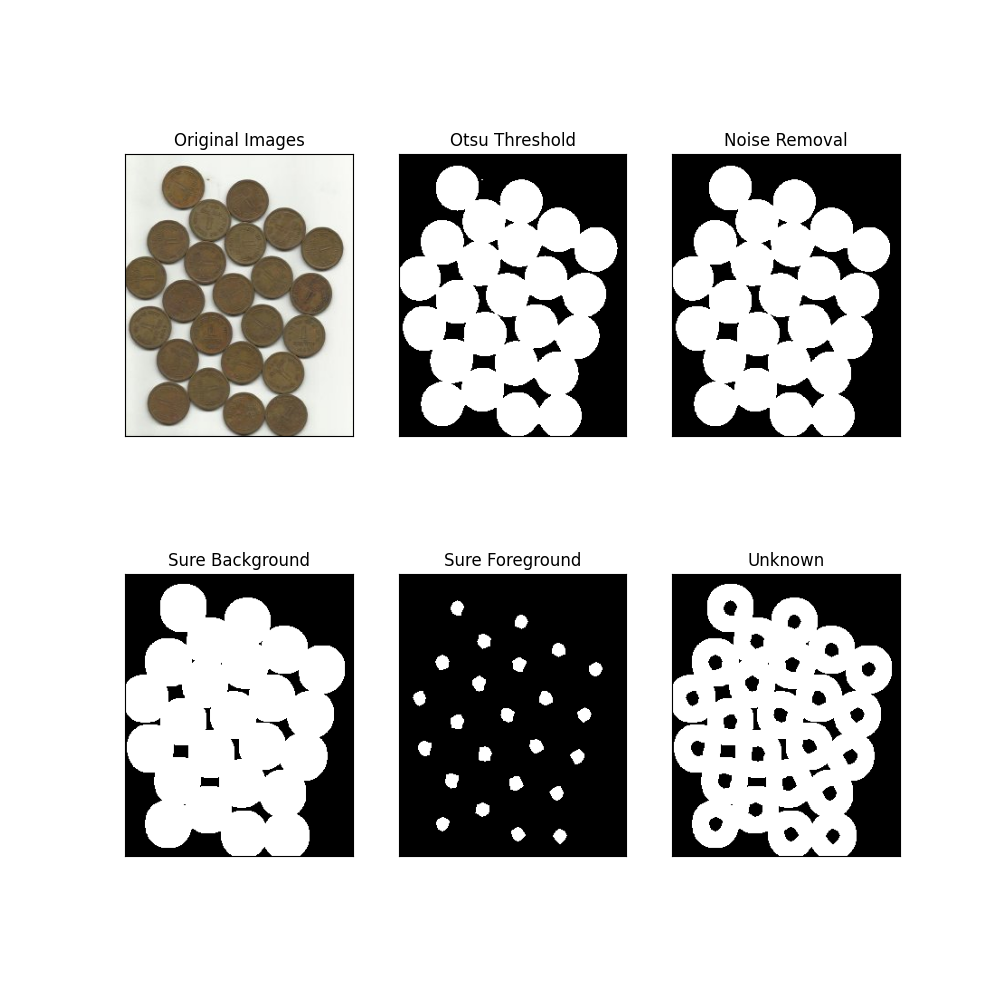

In [51]:
titles=["Original Images","Otsu Threshold","Noise Removal","Sure Background","Sure Foreground","Unknown"]
images=[rgb,thresh,opening,sure_bg,sure_fg,unknown]
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


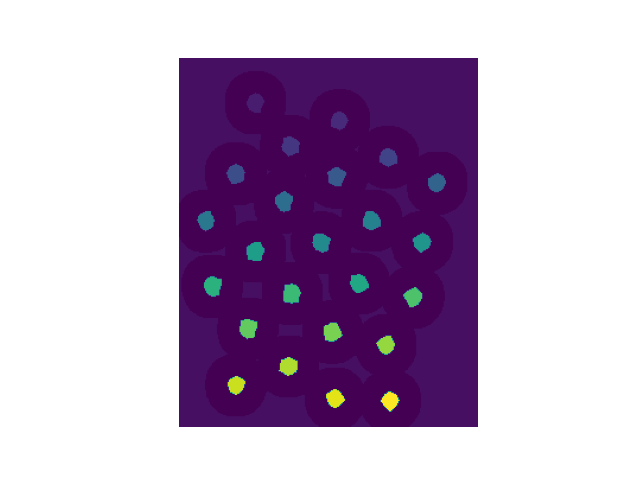

In [140]:
#Marker labelling
#We are sure which is background, which is foreground => Create marker to label each region
#We will label background and foreground with positive different int numbers
#Unknown will be labeled with 0
# => Use connectedComponents
ret, markers = cv.connectedComponents(sure_fg)

#Note: One more problem. connectedComponents will label background with 0
# => Same with unknown
# => Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers),plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


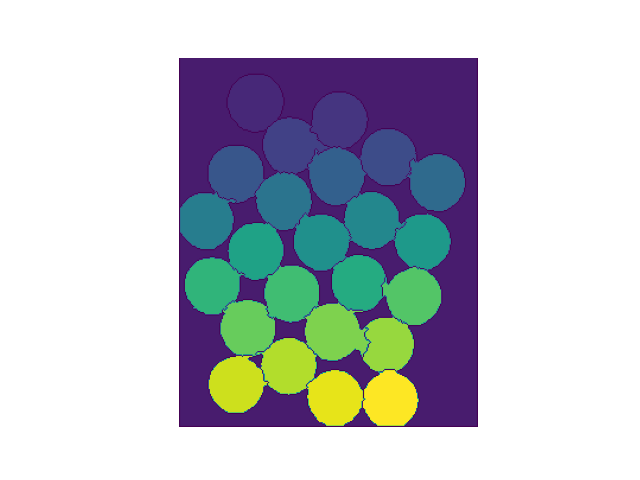

In [141]:
#Apply watershed
watershed = cv.watershed(img,markers)
plt.imshow(watershed),plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


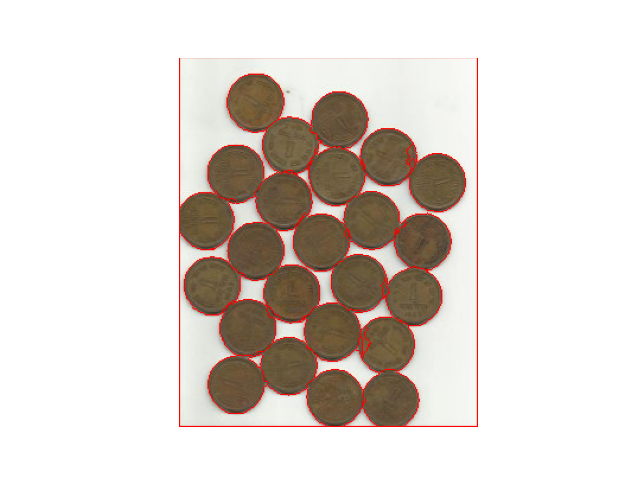

In [142]:
rgb[watershed == -1] = [255,0,0]
plt.imshow(rgb),plt.axis('off')
plt.show()